# Setup and imports  

In [ ]:
from google.colab import files
import zipfile
import os
import sys

# Upload the dataset
uploaded = files.upload()

with zipfile.ZipFile("bonn-eeg-ml.zip", 'r') as zip_ref:
    zip_ref.extractall()

base_path = "bonn-eeg-ml"
for fname in os.listdir(base_path):
    if fname.endswith(".zip"):
        fpath = os.path.join(base_path, fname)
        extract_to = os.path.join(base_path, fname.replace(".zip", ""))
        with zipfile.ZipFile(fpath, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

sys.path.append(os.path.join(base_path, "scripts"))

Saving bonn-eeg-ml.zip to bonn-eeg-ml (1).zip


#Upload Scripts

In [ ]:
#UPLOAD SCRIPTS
from google.colab import files
uploaded = files.upload()



Saving extract_features.py to extract_features (6).py
Saving preprocess.py to preprocess (6).py
Saving train_model_w6.py to train_model_w6 (6).py
Saving trainmodel.py to trainmodel.py
Saving utils.py to utils.py


#Import Functions

In [ ]:
from utils import plot_confusion_matrix, plot_roc_per_class, print_metrics_table, save_metrics_to_json

In [ ]:
from trainmodel import train_and_eval

# Train final model & Evaluation Metrics

In [ ]:
clf, (X_test, Y_test), y_pred, y_probs, class_names, feature_names = train_and_eval(
    z_folder="bonn-eeg-ml/z (2)/z/Z",
    f_folder="bonn-eeg-ml/f/F",
    s_folder="bonn-eeg-ml/s/S",
    limit=100, fs=256, seed=42
)


print_metrics_table(y_test, y_pred)
save_metrics_to_json(y_test, y_pred, "results/week07_rf_zfs_metrics.json")

Fold 1 done.
Fold 2 done.
Fold 3 done.
Fold 4 done.
Fold 5 done.
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000
Metrics saved to results/week07_rf_zfs_metrics.json


#Confusion Matrix + ROC Curves

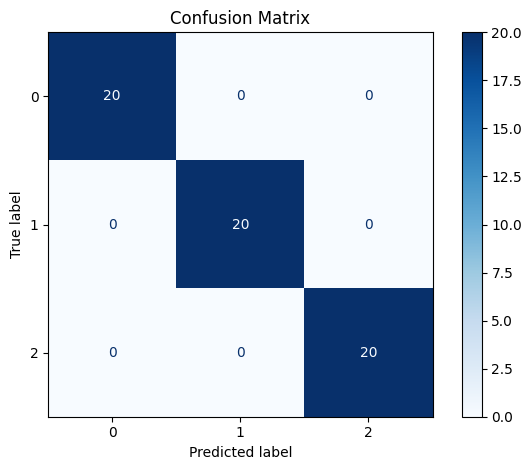

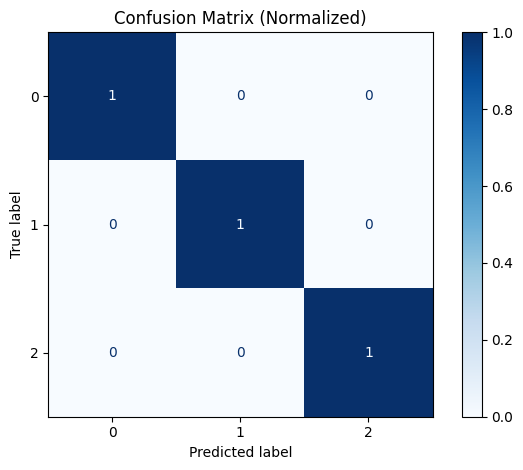

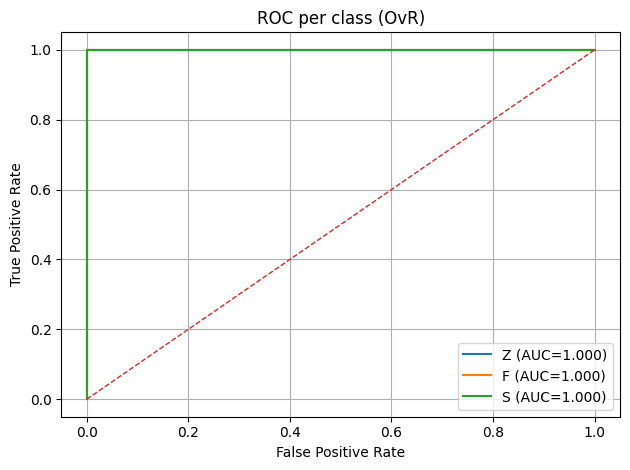

In [ ]:
plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[0,1,2])
plot_confusion_matrix(y_test, y_pred, normalize=True,  labels=[0,1,2])
plot_roc_per_class(y_test, y_probs, class_names)


In [ ]:
import os, pickle
os.makedirs("results", exist_ok=True)
with open("results/week07_rf_3class.pkl", "wb") as f:
    pickle.dump(rf, f)
